# Теория вероятностей и Математическая статистика
## Тема №7. Многомерный статистический анализ. Линейная регрессия.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Задача № 1

#### Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 
```
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], 
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 
```
#### Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). 

#### Произвести расчет как с использованием intercept, так и без.

In [2]:
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

x = np.array(zp)
y = np.array(ks)

**Парная линейная регрессия**

y_hat = a + bx

In [3]:
b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
b

2.620538882402765

In [4]:
a = np.mean(y) - b * np.mean(x)
a

444.1773573243596

y = 444.18 + 2.62*x

In [5]:
y_hat = a + b * x
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

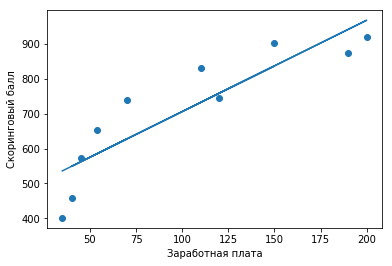

In [6]:
plt.scatter(x, y)
plt.plot(x, y_hat)
plt.xlabel('Заработная плата')
plt.ylabel('Скоринговый балл')
plt.show()

In [7]:
r = b * np.std(x) / np.std(y)
r

0.8874900920739162

In [8]:
R2 = r ** 2
R2

0.7876386635293682

In [9]:
A_mean = (abs((y - y_hat) / y)).sum() / len(x) * 100
A_mean

11.46925184356171

In [10]:
mse = ((y - y_hat) ** 2).sum() / len(x)
mse

6470.414201176658

**Матричный метод**

In [11]:
n = len(x)
xm = x.reshape((n, 1))
xm

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [12]:
ym = y.reshape((n, 1))
ym

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

y = b0 + b1 * x

In [13]:
bm = np.dot(np.linalg.inv(np.dot(xm.T, xm)), xm.T@ym)
bm

array([[5.88982042]])

In [14]:
bm1 = np.dot(np.linalg.inv(np.dot(xm.T, xm)), xm.T@ym)
bm1

array([[5.88982042]])

In [15]:
xm = np.hstack([np.ones((n, 1)), xm])
xm

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [16]:
bm2 = np.dot(np.linalg.inv(np.dot(xm.T, xm)), xm.T@ym)
bm2

array([[444.17735732],
       [  2.62053888]])

In [17]:
y_hat1 = bm1[0] * x
y_hat1

array([ 206.1437147 ,  265.04191891, 1119.06587983, 1177.96408403,
        235.59281681,  412.28742941,  318.05030269,  883.47306302,
        706.77845042,  647.88024621])

In [18]:
y_hat2 = bm2[0] + bm2[1] * x
y_hat2

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

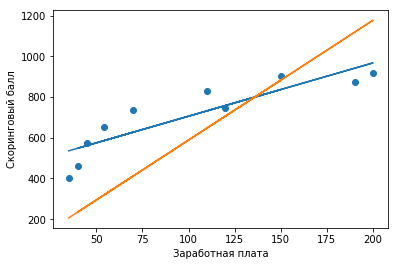

In [19]:
plt.scatter(x, y)
plt.plot(x, y_hat2)
plt.plot(x, y_hat1)
plt.xlabel('Заработная плата')
plt.ylabel('Скоринговый балл')
plt.show()

### Задача № 2

#### Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [20]:
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

x = np.array(zp)
y = np.array(ks)
n = len(x)

In [21]:
def mse_(B1, y=y, x=x, n=n):
    return (1/n) * np.sum((B1 * x - y) ** 2)

def mse_p(B1, y=y, x=x, n=n):
    return (2/n) * np.sum((B1 * x - y) * x)

In [22]:
alpha = 2e-6
B1 = 0
for i in range(501):
    B1 -= alpha * mse_p(B1)
    if not i % 50:
        print(f'iteration: {i}, B1 = {B1}, mse = {mse_(B1)}')

iteration: 0, B1 = 0.32456680000000004, mse = 483206.37291419966
iteration: 50, B1 = 5.5627582368316855, mse = 57990.53679549011
iteration: 100, B1 = 5.8705994323669835, mse = 56521.94813058985
iteration: 150, B1 = 5.888690829524075, mse = 56516.87599431581
iteration: 200, B1 = 5.889754035670109, mse = 56516.85847643147
iteration: 250, B1 = 5.8898165188105285, mse = 56516.858415929106
iteration: 300, B1 = 5.889820190857434, mse = 56516.85841572014
iteration: 350, B1 = 5.889820406658501, mse = 56516.85841571939
iteration: 400, B1 = 5.889820419340829, mse = 56516.858415719405
iteration: 450, B1 = 5.889820420086153, mse = 56516.858415719405
iteration: 500, B1 = 5.889820420129954, mse = 56516.858415719405


значение b1 соответствует значению, вычисленному матричным методом

### Задача № 3

#### В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

При больших значениях n (n > 100) используется таблица значений функции Лапласа, а при малых - таблица критических точек распределения Стьюдента.

### Задача № 4

#### Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [23]:
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

x = np.array(zp)
y = np.array(ks)
n = len(x)

In [24]:
def mse_2(b0, b1, y=y, x=x, n=n):
    return (1/n) * np.sum((b0 + b1 * x - y) ** 2)


In [25]:
alpha0 = 5e-5
alpha1 = 5e-5
b0 = 0
b1 = 0

for i in range(1000000):
    y_ = b0 + b1 * x
    b0 -= alpha0 * (2/n) * np.sum((y_ - y))
    b1 -= alpha1 * (2/n) * np.sum((y_ - y) * x)
    if not i % 50000:
        print(f'i: {i}, b0 = {b0}, b1 = {b1}, mse = {mse_2(b0, b1)}')

i: 0, b0 = 0.07099000000000001, b1 = 8.114170000000001, mse = 124695.80133979913
i: 50000, b0 = 319.2379294525127, b1 = 3.5401483104337204, mse = 10430.088099722147
i: 100000, b0 = 409.02972996943777, b1 = 2.8792409593936914, mse = 6783.780596229795
i: 150000, b0 = 434.2897203331964, b1 = 2.6933162622331577, mse = 6495.213843789821
i: 200000, b0 = 441.39579359939756, b1 = 2.641012421218453, mse = 6472.376831131397
i: 250000, b0 = 443.3948552196657, b1 = 2.626298443857366, mse = 6470.569522622184
i: 300000, b0 = 443.95722591469394, b1 = 2.622159146903591, mse = 6470.426493229665
i: 350000, b0 = 444.1154305420171, b1 = 2.620994690900209, mse = 6470.415173962915
i: 400000, b0 = 444.15993624675195, b1 = 2.6206671092362583, mse = 6470.414278162422
i: 450000, b0 = 444.17245647316844, b1 = 2.620574954834323, mse = 6470.41420726927
i: 500000, b0 = 444.17597862994756, b1 = 2.6205490302031937, mse = 6470.414201658823
i: 550000, b0 = 444.17696947371286, b1 = 2.620541737155004, mse = 6470.41420121

матричный метод:

`b0 = 444.17735732`

`b1 = 2.62053888`

градиентный спуск:

`b0 = 444.1773573091264`

`b1 = 2.6205388825148885`